## **Project Overview**



Health insurance is an essential service, and being able to predict or know accurate premium pricing plays a critical role in balancing customer fairness with company risk management. Understanding the factors/features that influence health insurance premiums—such as age, smoking habits, BMI, and medical history—is crucial for underwriters and decision-makers, as it can guide risk assessment, customer profiling, and pricing strategies.

Being able to predict the premium for a particular applicant beforehand can also help underwriters make more informed and consistent decisions. For example, if the model shows that a young, healthy, non-smoking applicant is expected to have a lower premium, the underwriter can quickly validate and approve the policy with confidence. On the other hand, for applicants with higher risk factors, the system can flag them for additional review or suggest adjusted pricing.

Additionally, deploying a predictive model through an easy-to-use Streamlit application means that underwriters can access accurate premium estimates instantly, from anywhere. This not only speeds up the underwriting process but also improves transparency and consistency in decision-making.

Being able to accurately predict health insurance premiums is a powerful tool. It allows underwriters to make quicker, smarter, and fairer decisions, helps companies serve customers faster, and lays the foundation for a fully automated quoting system. Ultimately, this leads to improved customer satisfaction, reduced operational costs, and a stronger competitive position in the insurance market.



In this project, i used a dataset of various attributes such as 'age', 'gender', 'region', 'marital_status', 'number_of_dependants','bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan', 'income_usd','annual_premium_usd'




<br>

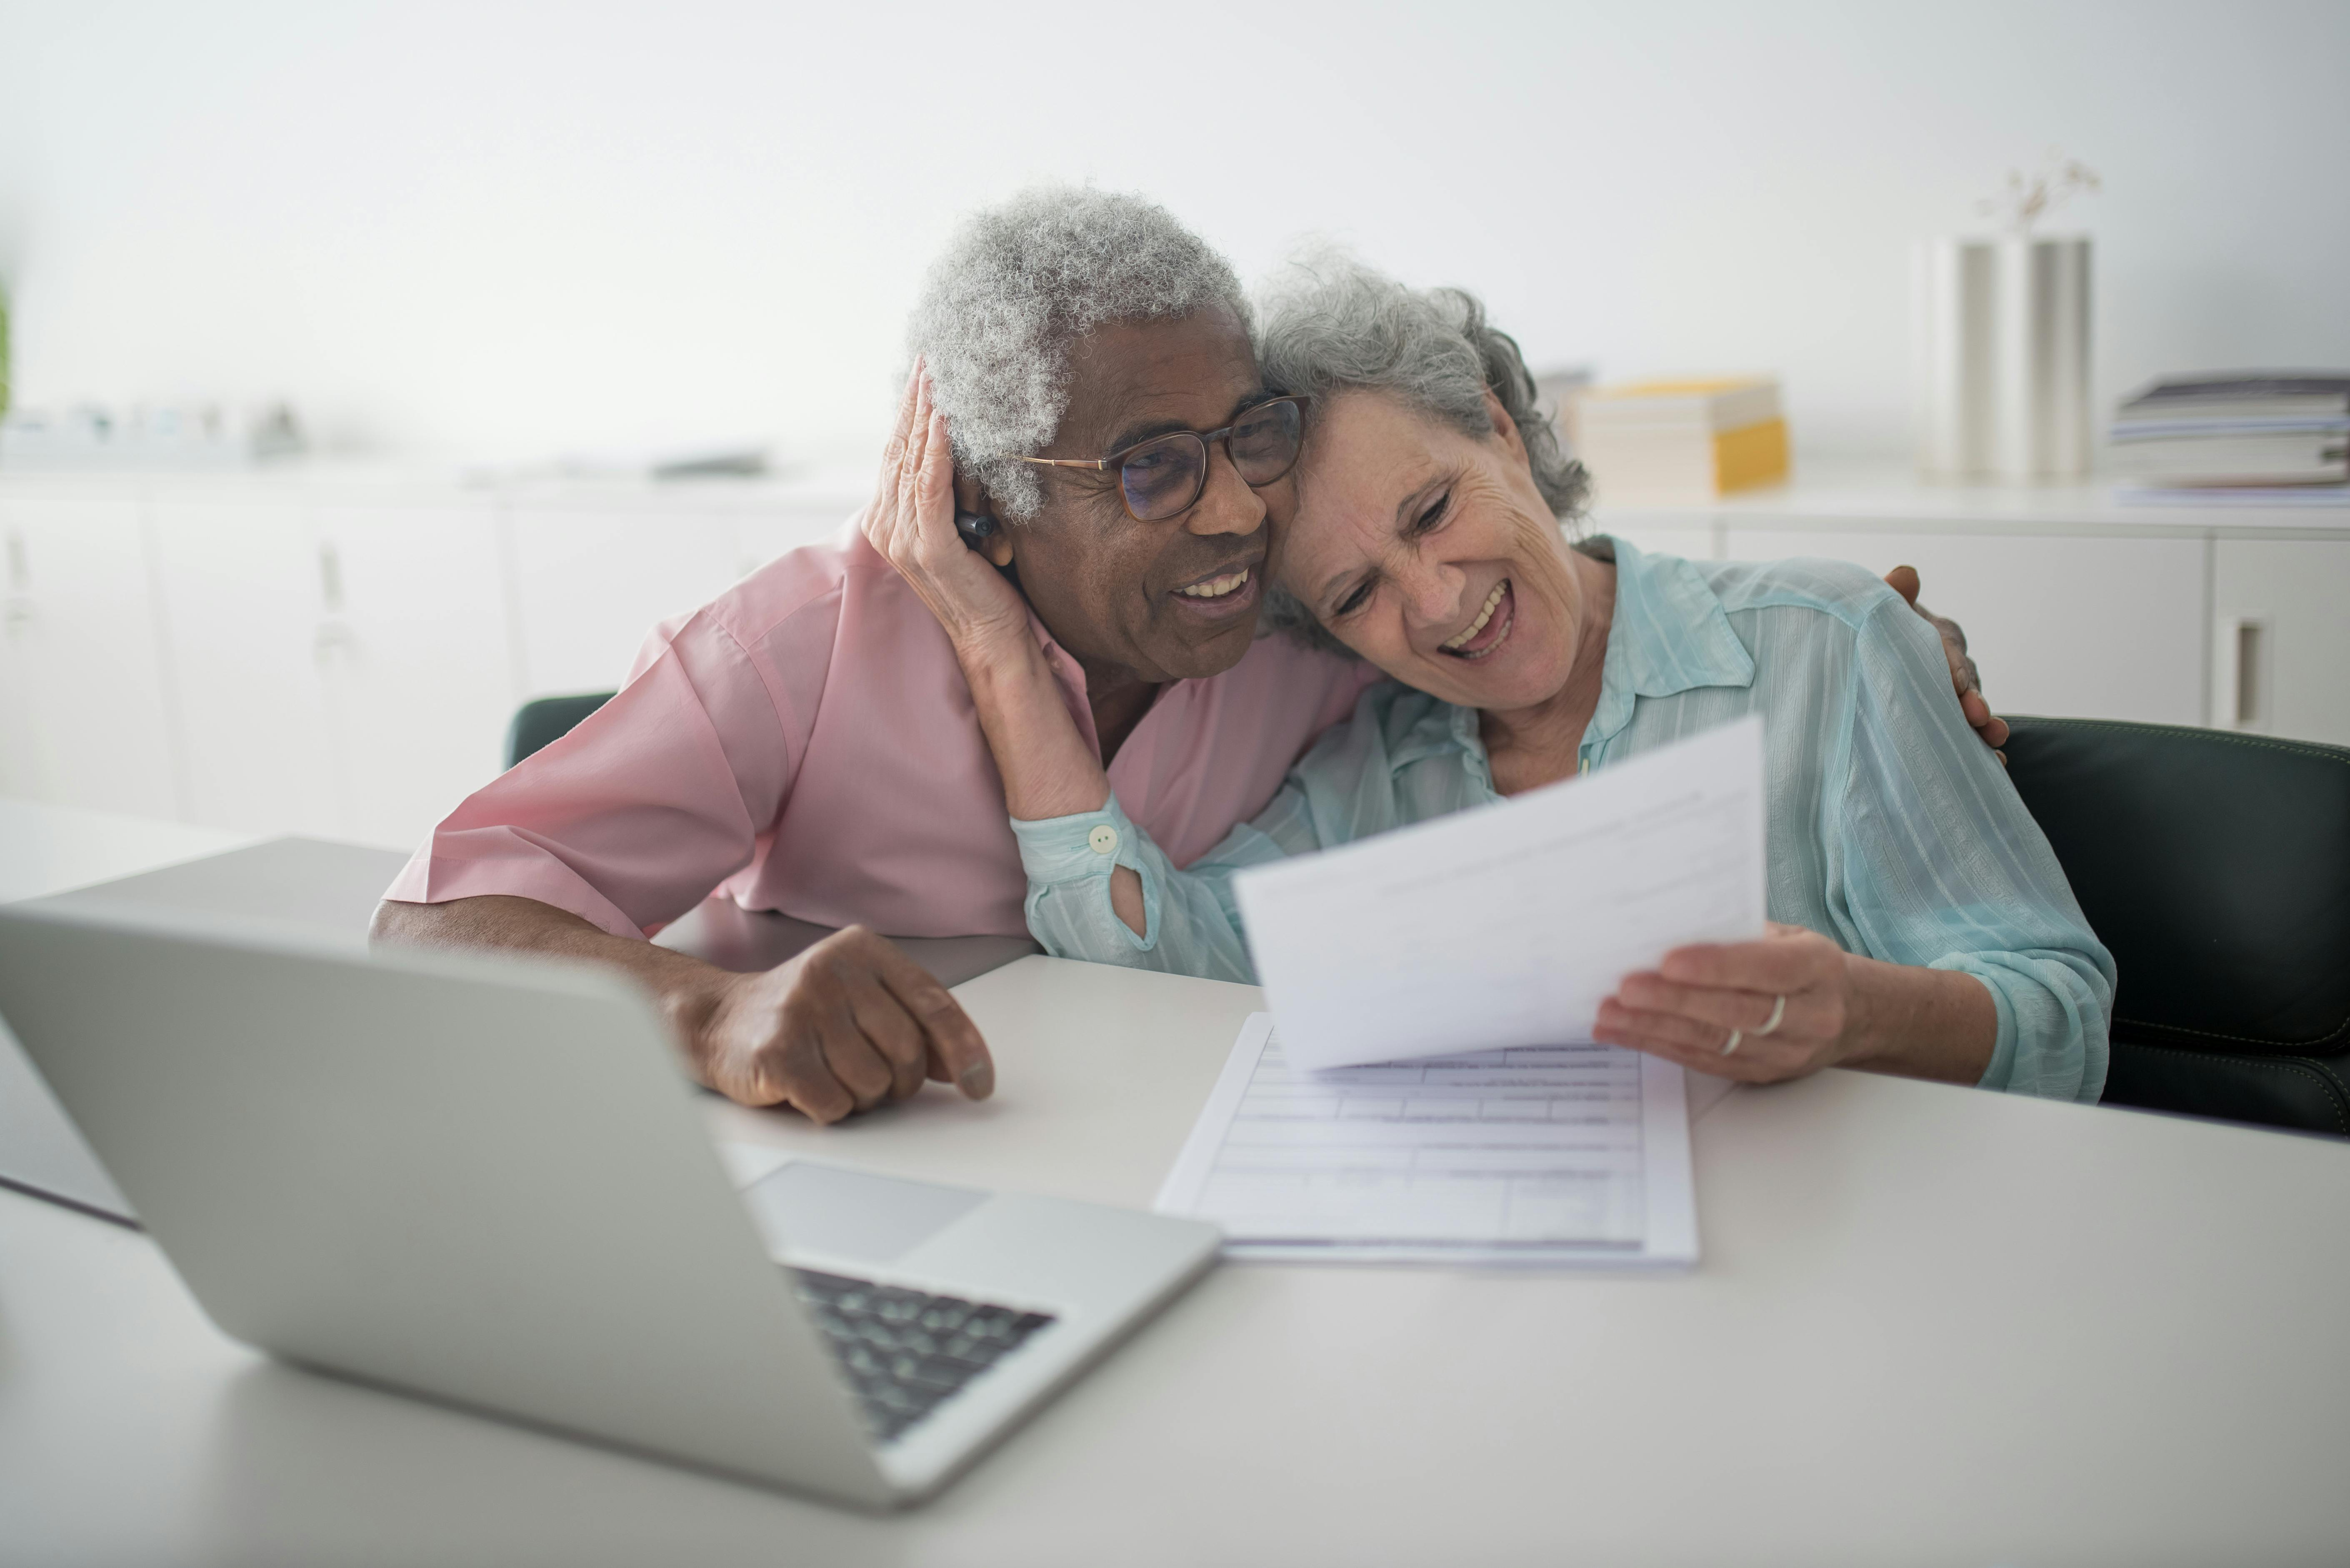

<br>




<h1 align ="center"> Methodology</h1>

<div align="center">
  <img src="CRISP-DM_Process_Diagram.png" width="600">
</div>

For this project, I will be following the **CRISP-DM (Cross Industry Standard Process for Data Mining)** methodology. \
This framework provides a structured and iterative approach for data science projects, covering six key phases:

- Business Understanding – define the objectives, scope, and success criteria for predicting health insurance premiums.

- Data Understanding – collect, explore, and assess the health insurance dataset to identify data quality issues and initial insights.

- Data Preparation – clean and transform the data (handling missing values, encoding categorical variables, scaling numerical features, and feature engineering such as risk scores).

- Modeling – build and evaluate predictive models (Linear Regression, Ridge, Lasso, XGBoost, etc.) using appropriate feature sets.

- Evaluation – validate the models against the business objectives, using metrics such as R², RMSE, and MAE to measure predictive performance.

- Deployment – package the best-performing model into a production-ready pipeline for use in applications (e.g., via Streamlit).

 
<h1 align ="center"> Business Understanding</h1>

Health insurance providers operate in a highly competitive market where **accurate premium pricing** is not only a financial necessity but also a key driver of customer trust and retention. Premiums that are **too high** risk losing customers to competitors, while premiums that are **too low** may expose the company to financial losses.  

This project aims to **predict annual health insurance premiums** using customer demographics, lifestyle indicators, and medical history. By building a robust predictive model, the business can:  

- **Enhance Risk Management** – quantify and understand how different risk factors (such as age, smoking status, or pre-existing conditions) affect premium levels.  
- **Support Data-Driven Pricing** – replace or complement manual underwriting with a data-driven system that ensures consistency, fairness, and transparency.  
- **Improve Customer Segmentation** – tailor policies and marketing strategies to specific risk groups, improving competitiveness and personalization.  
- **Increase Efficiency** – streamline the premium estimation process, reducing time spent on manual calculations and minimizing human error.  

**Business success criteria**:  
- A predictive model that achieves a **high level of accuracy** (low error rates, strong R²).  
- A system that delivers **actionable insights** into which features most influence premium amounts.  
- A deployable solution that can be integrated into internal tools (e.g., via Streamlit) for easy use by underwriters and decision-makers.  


<h1 align ="center"> Data Understanding</h1>

#### Data Dictionary
The dataset contains **12 variables** that capture key demographic, lifestyle, and medical attributes of individuals, along with the **annual premium amount** they are required to pay.  


| Column Name              | Description                                                                 | Data Type | Example Value |
|---------------------------|-----------------------------------------------------------------------------|-----------|---------------|
| **Age**                  | Age of the individual (in years).                                           | Integer   | 26 |
| **Gender**               | Gender of the individual.                                                   | String    | Male |Female
| **Region**               | Geographic region where the individual resides.                            | String    | Northwest |
| **Marital_status**       | Marital status of the individual (Married / Unmarried).                     | String    | Unmarried |
| **Number Of Dependants** | Number of people dependent on the individual.                              | Integer   | 0 |
| **BMI_Category**         | Weight category based on Body Mass Index (Normal, Obesity, Overweight, etc.). | String  | Normal |
| **Smoking_Status**       | Whether the individual smokes (Regular / No Smoking).                       | String    | No Smoking |
| **Employment_Status**    | Employment type of the individual (Salaried, Self-Employed, etc.).          | String    | Salaried |
| **Income_Level**         | Income category in Lakhs of INR (e.g., `<10L`, `10L - 25L`, `>40L`).        | String    | <10L |
| **Medical History**      | Key medical conditions of the individual (e.g., Diabetes, High BP, None).   | String    | Diabetes |
| **Insurance_Plan**       | Type of insurance plan chosen (Bronze, Silver, Gold, etc.).                 | String    | Bronze |
| **Annual_Premium_Amount**| Annual premium payable (in Indian Rupees).                                 | Integer   | 9053 |



## **Packages**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import warnings
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

<h2 align="center" >Data Loading</h2>

#### **1. Files**
 
In many cases, the data is stored in local system. To read the data from the local system, specify the correct path and filename.
* **CSV format**
 
Comma-separated values, also known as CSV, is a specific way to store data in a table structure format.

Use following code to read data from csv file using pandas. 
```
import pandas as pd
csv_file_path= "........................."
df = pd.read_csv(csv_file_path)
```
With appropriate csv_file_path, pd.read_csv() function will read the data and store it in df variable.
 
<br>


 
 
#### **2. Database**
 
Most organization store their data in databases such as [MySQL](https://www.mysql.com/) or [Postgres](https://www.postgresql.org/). The data can be accessed by secret credentials, which will be in the following format.
```
host = "host address"
database= "......." the name of the database
user = "......." 
password = "............"
```
 


<br>


In [3]:
df = pd.read_csv(r"C:\Users\guest_l38yilz\Downloads\ML\project_1_model_retraining_resources\premiums.csv")
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


<h1 align ="center"> Exploratory Data Analysis</h1>

Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


In [4]:
df.shape

(50000, 13)

This data contains 50,000 rows and 13 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


From the above, it can be seen that 3 columns ['smoking_status','Employement_status','Income_Level'] all contain missing values and need to be treated

In [6]:
#Running simple descriptive statistics on numerical columns
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


<h1 align ="center">Basic Statistical Concepts</h1>


* **Mean**: The mean is one of the measures of central tendency. Simply put, the mean is the average of the values in the given set. The observed values are totaled and divided by the total number of observations to determine the mean.
If $x_i$ is $i^{th}$ observation then mean of all $x_i$ ranging from $ 1\leq i\leq n $ denoted by $\bar x$ is given as

$$ \bar{x} = \sum_{i=1}^{n}\frac{x_i}{n} $$


* **Variance**: Variance is a measure of variation. It is calculated by averaging the squared deviations from the mean.
The degree of spread in your data set is indicated by variation. The greater the spread of the data, the greater the variance in proportion to the mean.
Here's the formula for variance of a sample.

$$S^2 = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$


* **Standard Deviation**: The standard deviation is a measure that shows how much variation (such as spread, dispersion, and spread) exists from the mean. The standard deviation represents a "typical" departure from the mean. It is a popular measure of variability since it returns to the data set's original units of measurement.
Here's the formula for standard deviation of a sample.

$$S = \sqrt \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$


* **Minimum (Min)**  
  The minimum is the smallest value in a dataset. It indicates the lower bound of the observed data.  


* **Maximum (Max)**  
  The maximum is the largest value in a dataset. It indicates the upper bound of the observed data.  

  

* **Percentiles**  
  Percentiles divide ordered data into 100 equal parts. The $p^{th}$ percentile is the value below which $p\%$ of the data fall.  

  - **25th Percentile (Q1)**: The value below which 25% of the data lie.  
  - **50th Percentile (Q2 / Median)**: The midpoint of the data, where half the values are above and half are below.  
  - **75th Percentile (Q3)**: The value below which 75% of the data lie.  

  If the ordered dataset is $x_{(1)}, x_{(2)}, \dots, x_{(n)}$, then the $p^{th}$ percentile is the value at position:  

  (Interpolation is used if the index is not an integer).


From the descriptive statistics above:
### Age
- Mean : Mean age of 34 looks ok
- std : This shows how far or close the values/data points are from the mean
- min : the min age for health insurance is 18
- max : Max age is 356 which doesnt make sense

### Number Of Dependants
- Mean : Mean of 1
- std : Std of 1
- min : -3. Doesnt make sense as no one can have -3 number of dependants.

### Income_Lakhs
- Mean : Mean of 23 lakhs
- min : 1. will have a look at this
- max : 930


### Annual_premium_amount
- Mean : 15768
- min : 3501
- max :43471

<h1 align ="center">Data Quality Issues</h1>

- Missing Values 
- Duplicates
- outliers
- Inconsistency

In [7]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

Out of 13 columns, 3 columns: smoking_status, employment_status and income_level have missing values of 11,2,13 respectively

In [8]:
# using the any method to return whether any element is True on the column axis
df[df.isnull().any(axis=1)]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
177,26,Female,Southwest,Married,3,Underweight,NaN,Salaried,> 40L,69,Diabetes,Gold,22605
997,20,Female,Southeast,Unmarried,0,Normal,No Smoking,Self-Employed,NaN,5,No Disease,Bronze,7191
7094,33,Male,Southeast,Married,2,Normal,Regular,Self-Employed,NaN,7,High blood pressure,Silver,18335
15395,27,Female,Northeast,Unmarried,2,Underweight,No Smoking,Freelancer,NaN,5,No Disease,Silver,14469
15452,52,Male,Northeast,Married,3,Underweight,No Smoking,Freelancer,NaN,8,Thyroid,Silver,19535
15648,47,Male,Southwest,Married,4,Normal,NaN,Freelancer,25L - 40L,32,Diabetes,Gold,26100
16324,45,Male,Northwest,Married,4,Overweight,NaN,Salaried,10L - 25L,16,High blood pressure & Heart disease,Silver,21881
16941,34,Male,Southwest,Married,5,Normal,NaN,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Gold,25865
16975,23,Male,Southwest,Unmarried,0,Normal,NaN,Freelancer,<10L,3,No Disease,Bronze,6001
17438,40,Female,Northeast,Married,4,Obesity,Regular,Self-Employed,NaN,8,High blood pressure,Silver,22392


In [9]:
#checking the percentage of missing values 
df.isna().sum().sum()/df.shape[0] *100

0.052

Since we have only 0.05 percent of data missing from the dataset, i decided to drop these rows and they are not large enough to affect our analysis

In [10]:
df = df.dropna()
df

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


<h1 align ="center">Duplicates</h1>


In [11]:
#checking for duplicated rows as this affect the accuracy of our model and analysis
df[df.duplicated()]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount


No duplicates found

<h1 align ="center">Data Inconsistency</h1>


In [12]:
#making our columns lower and shake-case
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


While looking at the descriptive statistics of the dataset, i noticed the number of dependanats column had -1 and -3. \
This is an inconsistency as the range of values here are supposed between 1-10 or possitive numbers

#### Data Cleaning: number_of_dependants

In [13]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [14]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


<h1 align ="center">Univariate analysis</h1>


## Numeric Columns

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns

['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount']

### **Distribution Plots**

Distribution plots are graphical representations that show the distribution of a set of numerical data. These plots are used to gain insight into the characteristics of the data, such as the central tendency, spread, and skewness. There are several types of distribution plots, including histograms, density plots, box plots, and violin plots.

* A histogram is a bar graph that represents the frequency distribution of a set of data. It shows how many data points fall into each range of values or bin. The bars in the histogram represent the frequency of data points within a given range, and the height of each bar represents the number of data points in that bin.

* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a set of data. It shows the median, quartiles, and outliers of the data in a compact and easily interpretable format. The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend from the box to the minimum and maximum values of the data, and any outliers are plotted as individual points outside the whiskers.


* Distribution plots are an important tool for exploratory data analysis and can help in understanding the distribution of the data, identifying patterns and outliers, and making informed decisions about the data. They provide a visual representation of the data and can be used to identify potential issues with the data, such as non-normality or outliers.

#### Outlier detection


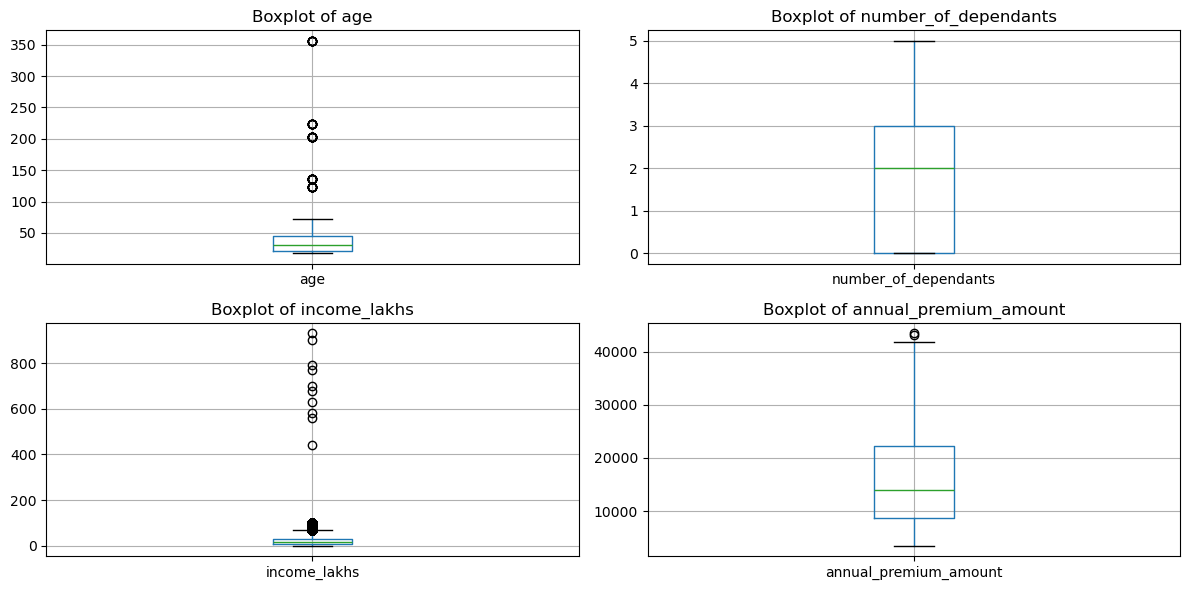

In [16]:
# Detecting out outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each boxplot in its own subplot
for i, col in enumerate(numeric_columns):
    df[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# # Adjust layout
plt.tight_layout()
plt.show()

<div align="center">
  <img src="image.png" width="600">
</div>

Looking above it can be seen that the age column has outliers

### Outlier Treatment: Age Column
I decided to remove all rows where age is greeter than 100

In [17]:
#checking the unique age values greeter than 100
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [18]:
df1 = df[df.age<=100].copy()
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

As you can see above, the max age is now 72 instead of 356

### Outlier Treatment: Income Column

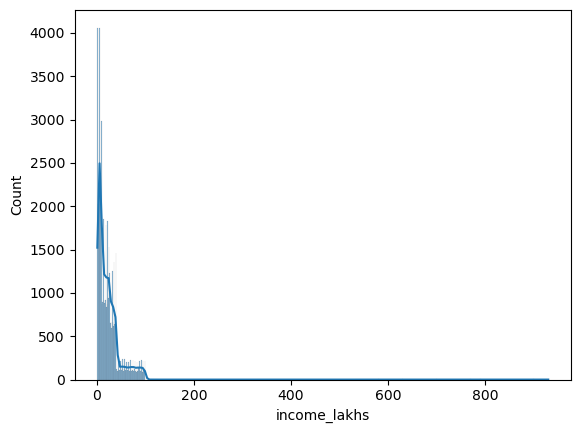

In [19]:
sns.histplot(df.income_lakhs, kde=True)
plt.show()

From the above histogram, we can see that majority of the data is concentrated between 0-150 income level

In [20]:
df1.income_lakhs.describe()

count    49918.000000
mean        23.025141
std         24.227912
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [21]:
#Calculating IQR
#Lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

def IQR_bounds(column):
   Q1, Q3 = column.quantile([0.25,0.75])
   IQR = Q3 - Q1
   lower = Q1 - 1.5 * IQR 
   upper = Q3 + 1.5 * IQR
   return (lower,upper)

In [22]:
lower, upper = IQR_bounds(df1.income_lakhs)
lower, upper 

(-29.0, 67.0)

In [23]:
#Rows above the 75 quantitle, otherwise detected as outliers
df1[df1.income_lakhs > upper]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
24,55,Male,Southeast,Married,4,Normal,No Smoking,Freelancer,> 40L,83,Thyroid,Gold,26979
34,22,Female,Southwest,Unmarried,0,Normal,No Smoking,Salaried,> 40L,70,No Disease,Silver,11305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49900,35,Male,Southwest,Married,5,Overweight,No Smoking,Salaried,> 40L,97,No Disease,Gold,22194
49955,43,Male,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,91,High blood pressure,Silver,15342
49975,18,Female,Southeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,89,No Disease,Silver,9783
49993,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603


The above shows that the lower income bound in india is around -29 and the higher bound around 67. \
Since alot of people in india earn above 67 lakhs and in this dataset (3,559 rows), i decided to check the 99 percent quantile of my dataset

In [24]:
#checking the 99 quantile of my data
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [25]:
# check how many rows are above this quantile
df1[df1.income_lakhs>quantile_thresold].shape

(10, 13)

In [26]:
# Dropping rows above the 99 quantile
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.shape

(49908, 13)

### **Distribution Plots**

Distribution plots are graphical representations that show the distribution of a set of numerical data. These plots are used to gain insight into the characteristics of the data, such as the central tendency, spread, and skewness. There are several types of distribution plots, including histograms, density plots, box plots, and violin plots.

* A histogram is a bar graph that represents the frequency distribution of a set of data. It shows how many data points fall into each range of values or bin. The bars in the histogram represent the frequency of data points within a given range, and the height of each bar represents the number of data points in that bin.

* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a set of data. It shows the median, quartiles, and outliers of the data in a compact and easily interpretable format. The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend from the box to the minimum and maximum values of the data, and any outliers are plotted as individual points outside the whiskers.


* Distribution plots are an important tool for exploratory data analysis and can help in understanding the distribution of the data, identifying patterns and outliers, and making informed decisions about the data. They provide a visual representation of the data and can be used to identify potential issues with the data, such as non-normality or outliers.

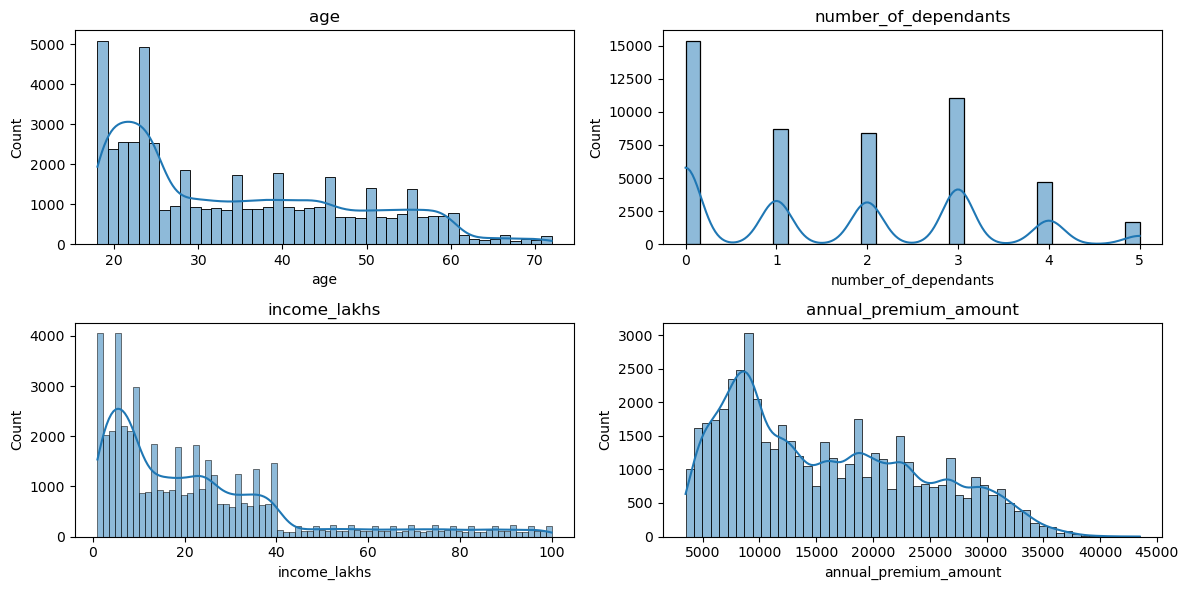

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6)) 
axs =  axs.flatten()
for i, column in enumerate(numeric_columns):
    # df2[[column]].hist(ax=axs[i],grid=False, )
    sns.histplot(df2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

<h1 align ="center">Bivariate analysis</h1>


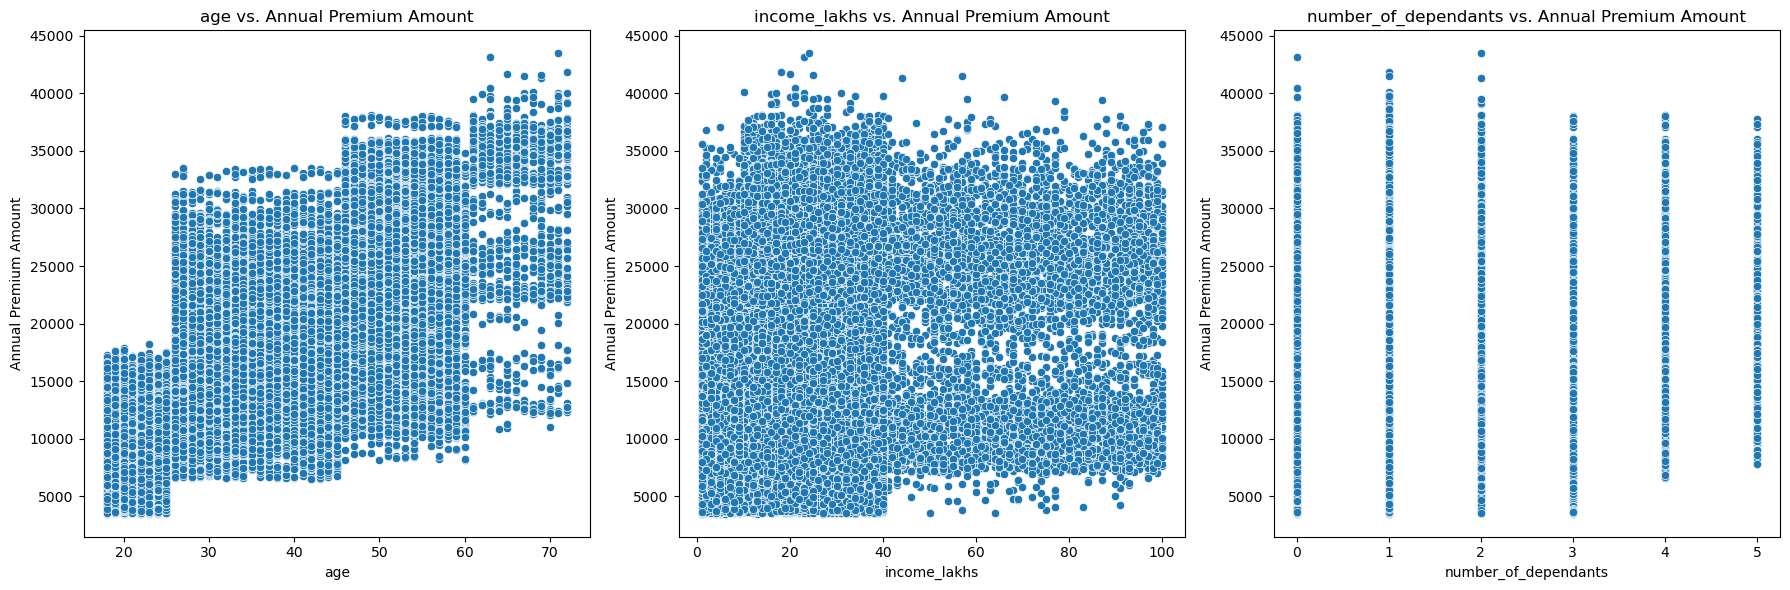

In [28]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6)) 
axes = axes.flatten()
for key, column in enumerate(numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=axes[key])
    axes[key].set_title(f'{column} vs. Annual Premium Amount')
    axes[key].set_xlabel(column)
    axes[key].set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

To better understand how different variables influence the target (**Annual Premium Amount**), scatterplots were generated for key numerical features:  

1. **Age vs. Premium**  
   - Premium amounts generally increase with age.  
   - Younger individuals (<25) tend to have lower premiums, while premiums rise significantly after age 40–50.    

2. **Income (Lakhs) vs. Premium**  
   - Income shows a relatively **weak direct relationship** with premiums.  
   - Customers across different income levels exhibit a wide range of premiums, suggesting that income alone is not a strong driver. A correlation matrix will help understand this more. 

3. **Number of Dependants vs. Premium**  
   - Dependants appear as discrete steps (0–5), with premiums clustering at each level.  
   - There is no strong trend showing higher premiums with more dependants, although slight variations may exist.  

**Key Insight:**  
Age is a strong predictor of premium, while income and number of dependants show weaker relationships individually. 

## **Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.
 



<div align="center">
  <img src="download.png" >
</div>

1. $r = -1$ indicates a perfect negative relationship between the variables 

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables


In [29]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants','annual_premium_amount']
df2[numeric_features].corr()

,age,income_lakhs,number_of_dependants,annual_premium_amount
age,1.000000,0.025060,0.415742,0.767569
income_lakhs,0.025060,1.000000,0.006074,0.243058
number_of_dependants,0.415742,0.006074,1.000000,0.414691
annual_premium_amount,0.767569,0.243058,0.414691,1.000000


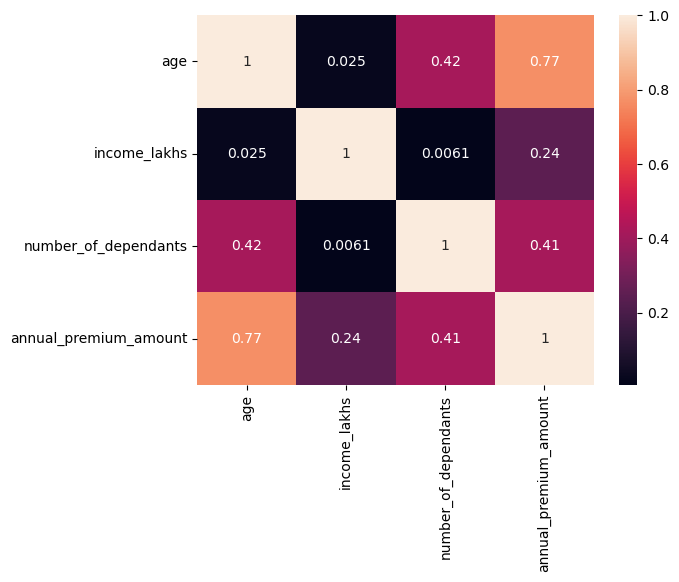

In [30]:
sns.heatmap(df2[numeric_features].corr(), annot=True)
plt.show()

### P-values for Numeric Features?  

When analyzing numeric features against the target variable (Annual Premium Amount), p-values help measure the **statistical significance** of each feature.  

- A **low p-value (< 0.05)** suggests that the feature has a meaningful relationship with the target and should be considered in the model.  
- A **high p-value (> 0.05)** indicates that the feature may not have a strong impact on the target, and its contribution could be due to chance.  

In summary, checking p-values allows us to identify which numeric variables are **statistically significant predictors** of insurance premiums.  


In [31]:
for i in numeric_features:
    r, p = pearsonr(df2[i], df2['annual_premium_amount'])
    print(f'P-value of {i}: {p}')

P-value of age: 0.0
P-value of income_lakhs: 0.0
P-value of number_of_dependants: 0.0
P-value of annual_premium_amount: 0.0


## Categorical Columns

In [32]:
#Looking at the number of unique cat variables in each column
categorical_cols = df2.select_dtypes('object').columns
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


#### Data Quality issues

In [33]:
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [34]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


In [35]:
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

<h1 align ="center">Univariate analysis</h1>


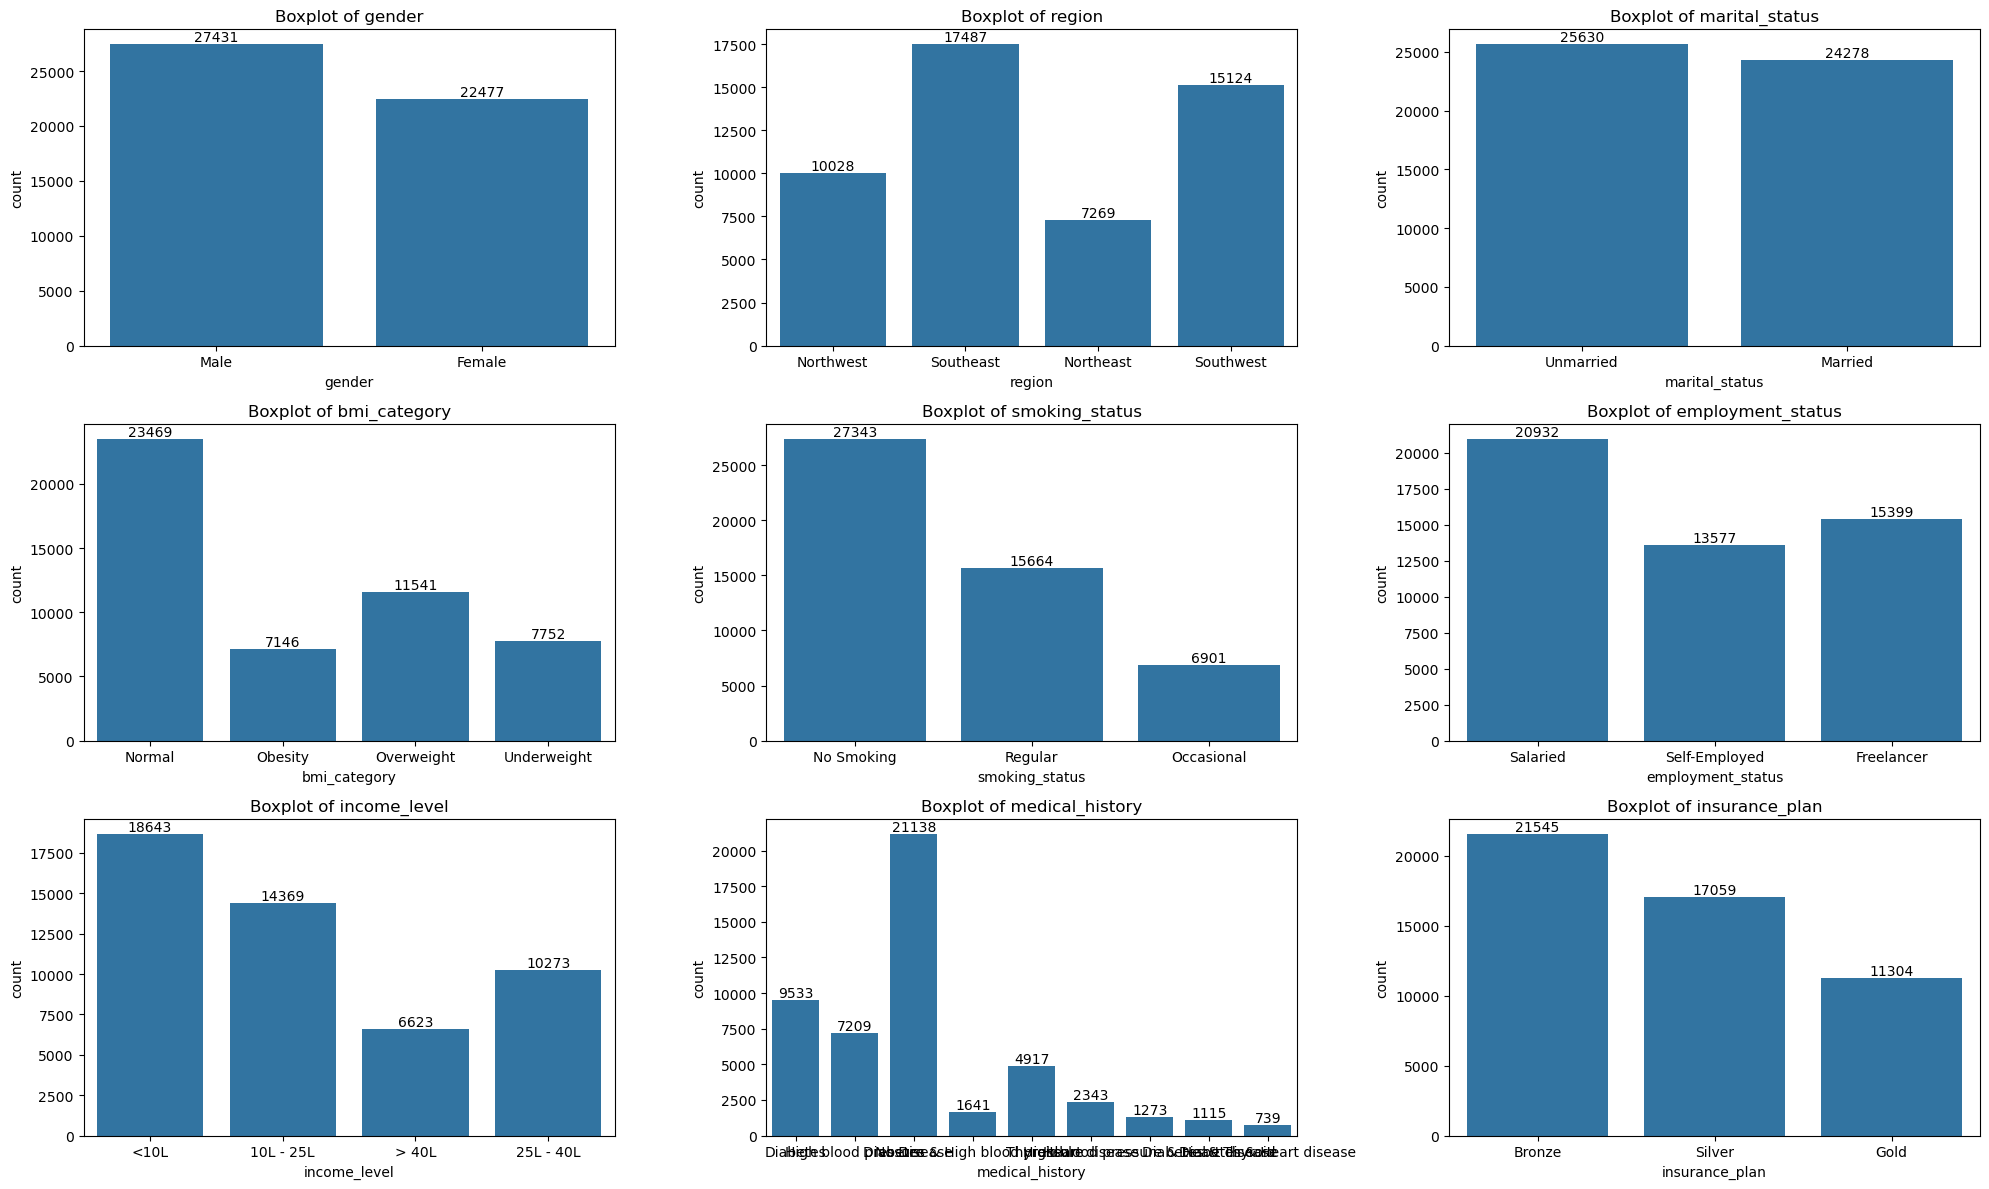

In [36]:
# Detecting out outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each boxplot in its own subplot
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(x=df2[col], ax=axes[i])
    # df[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].bar_label(ax.containers[0])

# # Adjust layout
plt.tight_layout()
plt.show()

<h1 align='center' >Categorical Feature Analysis  </h1>

The barplots below summarize their distributions:  

1. **Gender**  
   - Slightly more males (27,431) than females (22,477).  
   - Gender distribution is relatively balanced, ensuring both groups are well represented.  

2. **Region**  
   - The Southeast (17,487) and Southwest (15,124) regions dominate the dataset.  
   - The Northeast (7,269) is underrepresented, which may slightly bias regional insights.  

3. **Marital Status**  
   - Fairly balanced: 25,630 unmarried vs. 24,278 married individuals.  

4. **BMI Category**  
   - Majority fall under **Normal** (23,469).  
   - Obesity (7,146) and Underweight (7,752) are minority groups.  

5. **Smoking Status**  
   - Most individuals are **Non-Smokers** (27,343).  
   - Regular smokers: 15,664, Occasional smokers: 6,901.  
   - Indicates smoking could be a significant differentiator for premiums.  

6. **Employment Status**  
   - Salaried (20,932) is the largest group.  
   - Self-employed (13,577) and freelancers (15,399) are fairly represented.  

7. **Income Level**  
   - The largest group is `<10L` (18,643), followed by `10L - 25L` (14,369).  
   - High-income group `>40L` (6,623) is relatively small.  

8. **Medical History**  
   - Majority have **No Disease** (21,138).  
   - Conditions such as **Diabetes** (9,533) and **High Blood Pressure** (7,209) are the most common medical risk factors.  
   - Serious illnesses like **Cancer** (739) and **Heart Disease** (1,115) are rare but critical in influencing premiums.  

9. **Insurance Plan**  
   - Bronze plan is most common (21,545), followed by Silver (17,059), and Gold (11,304).  
   - Suggests customers may prefer lower coverage or cost-effective plans.  

**Key Insights:**  
- The dataset is **fairly balanced** across gender and marital status.  
- Some variables (e.g., Region, Medical History, Income Level) are **unevenly distributed**, which may influence model bias.  
- Smoking status, BMI, and Medical History are likely to be **highly influential** in determining premium amounts.  


<h1 align ="center">Bivariate analysis</h1>


### Chi-Square

- A **larger Chi-Square (χ²) value** means there is a **greater difference** between the observed data and the data we would expect if the variables were independent.  
- A **low p-value (< 0.05)** indicates that the categorical feature is likely related to the target and can be considered important.  
- A **high p-value (> 0.05)** suggests that the feature may not have a meaningful impact on the target.  
- In other words, a large χ² statistic suggests a **stronger association** between the categorical feature and the target variable.  
- A **smaller χ² value** means the observed data is closer to the expected distribution, indicating little or no relationship.  

The Chi-Square value itself tells us the *strength of the deviation*, while the **p-value** tells us whether that deviation is **statistically significant**.  


In [37]:
for i in categorical_cols:
    contingency = pd.crosstab(df[i], df['annual_premium_amount'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f'Feature: {i}, Chi2: {chi2}, P-value: {p}')
    if p > 0.05:
        print('No impact')


Feature: gender, Chi2: 23677.871355152267, P-value: 0.010491146635283565
Feature: region, Chi2: 69546.57638145825, P-value: 0.48583658507984173
No impact
Feature: marital_status, Chi2: 31810.945406104776, P-value: 7.444135902397338e-284
Feature: bmi_category, Chi2: 79123.08679578047, P-value: 3.8358510547313074e-134
Feature: smoking_status, Chi2: 114530.00345356987, P-value: 0.9977059831733421
No impact
Feature: employment_status, Chi2: 50097.69254611539, P-value: 2.4072423172697866e-33
Feature: income_level, Chi2: 76283.89948991933, P-value: 3.1141571552776675e-69
Feature: medical_history, Chi2: 221027.969507664, P-value: 0.0
Feature: insurance_plan, Chi2: 77609.4559022454, P-value: 0.0


### Chi-Square Test Results for Categorical Features  

To evaluate the association between categorical variables and the target (**Annual Premium Amount**), Chi-Square (χ²) tests were performed.  

| Feature           | Chi² Statistic       | P-value          | Interpretation |
|-------------------|----------------------|------------------|----------------|
| **Gender**        | 23,677.87           | 0.0104           | Significant relationship → Gender influences premiums. |
| **Region**        | 69,546.58           | 0.4858           | Not significant → Region has little/no impact. |
| **Marital Status**| 31,810.95           | ~0.0             | Highly significant → Marital status is an important predictor. |
| **BMI Category**  | 79,123.08           | ~0.0             | Strongly significant → BMI plays a key role in premium determination. |
| **Smoking Status**| 114,530.00          | 0.9977           | Not significant → Smoking status shows little impact in this dataset. |
| **Employment Status** | 50,097.69       | ~0.0             | Significant → Employment type affects premiums. |
| **Income Level**  | 76,283.90           | ~0.0             | Significant → Income categories correlate with premium levels. |
| **Medical History**| 221,027.97         | 0.0              | Extremely significant → Medical history is one of the strongest predictors. |
| **Insurance Plan** | 77,609.46          | 0.0              | Extremely significant → Insurance plan choice strongly determines premium. |

**Key Insights:**  
- **Strong predictors**: Medical History, Insurance Plan, BMI Category, Marital Status, Income Level, and Employment Status show significant relationships with premium amounts.  
- **Weak/No impact**: Region and Smoking Status do not appear to significantly influence premiums in this dataset.  
- Gender shows a **mild but statistically significant effect**.  

<h2 align="center" >Feature Engineering</h2>

In [38]:
# df2 = df2.drop(['smoking_status','region'], axis=1)

In [39]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


### Encode Text Columns
#### Medical_history

In [40]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [41]:
temp = df2.medical_history.str.lower().str.strip().str.split(" & ", expand=True)
df2[['disease1','disease2']] = temp
df2.disease1 = df2.disease1.map(risk_scores)
df2.disease2 = df2.disease2.map(risk_scores)
df2.disease1.fillna(0, inplace=True)
df2.disease2.fillna(0, inplace=True)
df2['total_risk_score'] = df2.disease1 + df2.disease2
# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,6,0.0,6.0,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,6,0.0,6.0,0.428571


##### Insurance_plan

In [42]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Gold': 3,'Silver': 2,'Bronze': 1})
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,6,0.0,6.0,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,6,0.0,6.0,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,6,0.0,6.0,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,0.0,0.0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,6,0.0,6.0,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,1,9111,0,0.0,0.0,0.000000
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,3,27076,5,0.0,5.0,0.357143
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,1,8564,0,0.0,0.0,0.000000
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,1,9490,0,0.0,0.0,0.000000


#### Income Level

In [43]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [44]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

## **One - Hot Encoding**

Most Machine Learning algorithms are unable to deal with categorical data and must be transformed to numerical data.
What are our options for converting categorical data to numerical data? Should we number the labels? For example, red represents 0 and blue represents 1. It will cause a bias in the model since the model will consider blue to be superior to red.

To address this, we use a categorical data encoding approach known as one hot encoding. In this method, we build a new feature for each label and assign it a value of 1. For example, if blue is present, it is marked as 1, else it is 0.


### **Dummy Variables**

Pandas get_dummies() converts categorical data into indicator variables. 

**data**: array-like, Series, or DataFrame,
Data of which to get dummy indicators.

**prefix**: str, list of str, or dict of str, default None,
String to append DataFrame column names. 

**drop_first**: bool, default False,
Whether to get k-1 dummies out of k categorical levels by removing the first level.


Refer to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) for more information.

In [45]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
# nominal_cols = ['gender', 'marital_status', 'bmi_category', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,6,0.0,6.0,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,6,0.0,6.0,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,6,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   medical_history                  49908 non-null  object 
 5   insurance_plan                   49908 non-null  int64  
 6   annual_premium_amount            49908 non-null  int64  
 7   disease1                         49908 non-null  int64  
 8   disease2                         49908 non-null  float64
 9   total_risk_score                 49908 non-null  float64
 10  normalized_risk_score            49908 non-null  float64
 11  gender_Male                      49908 non-null  int32  
 12  region_Northwest       

### Feature Selection

In [47]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


## **Multicollinearity**
### Calculate VIF for Multicolinearity
 
Some of the independent variables in regression are truly correlated with one another; this is known as multicollinearity, and it is critical to examine these before creating the regression model.
 
When two or more independent continuous variables in a dataset are highly correlated, they can help predict each other and the dependent variable. This makes analyzing the effect of these distinct, independent factors on the goal or dependent variable challenging. The model becomes sensitive to small changes in the data as changes in one multicollinear variable also show an inflated effect on others.
 
 
**How to calculate VIF?** 
 
In the least squares regression models, variance inflation factors (VIFs) evaluate the correlation between independent variables.
We can quantify multicollinearity using **Variance Inflation Factors (VIF)**.
VIF determines the strength of the correlation between the independent variables. It is predicted by regressing a variable against every other variable.
 
To compute the VIFs, all independent variables are converted into dependent variables. Each model generates an R-squared number representing the percentage of variation in the individual IV that the group of IVs explains. As a result, larger R-squared values suggest greater multicollinearity. These R-squared values are used in VIF calculations.
 
 
The more the value of $R^2$ is closer to 1, the more the VIF score tends to infinity. 
 
* VIF starts with one and denotes that the variable does not correlate at all. 
* VIF more than 5-10 can be considered a serious case of multicollinearity and can affect prediction models.
 
 
If two independent variables are too highly correlated $R^2$ > ~0.5, then only one of them should be used in the regression model.


In [48]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

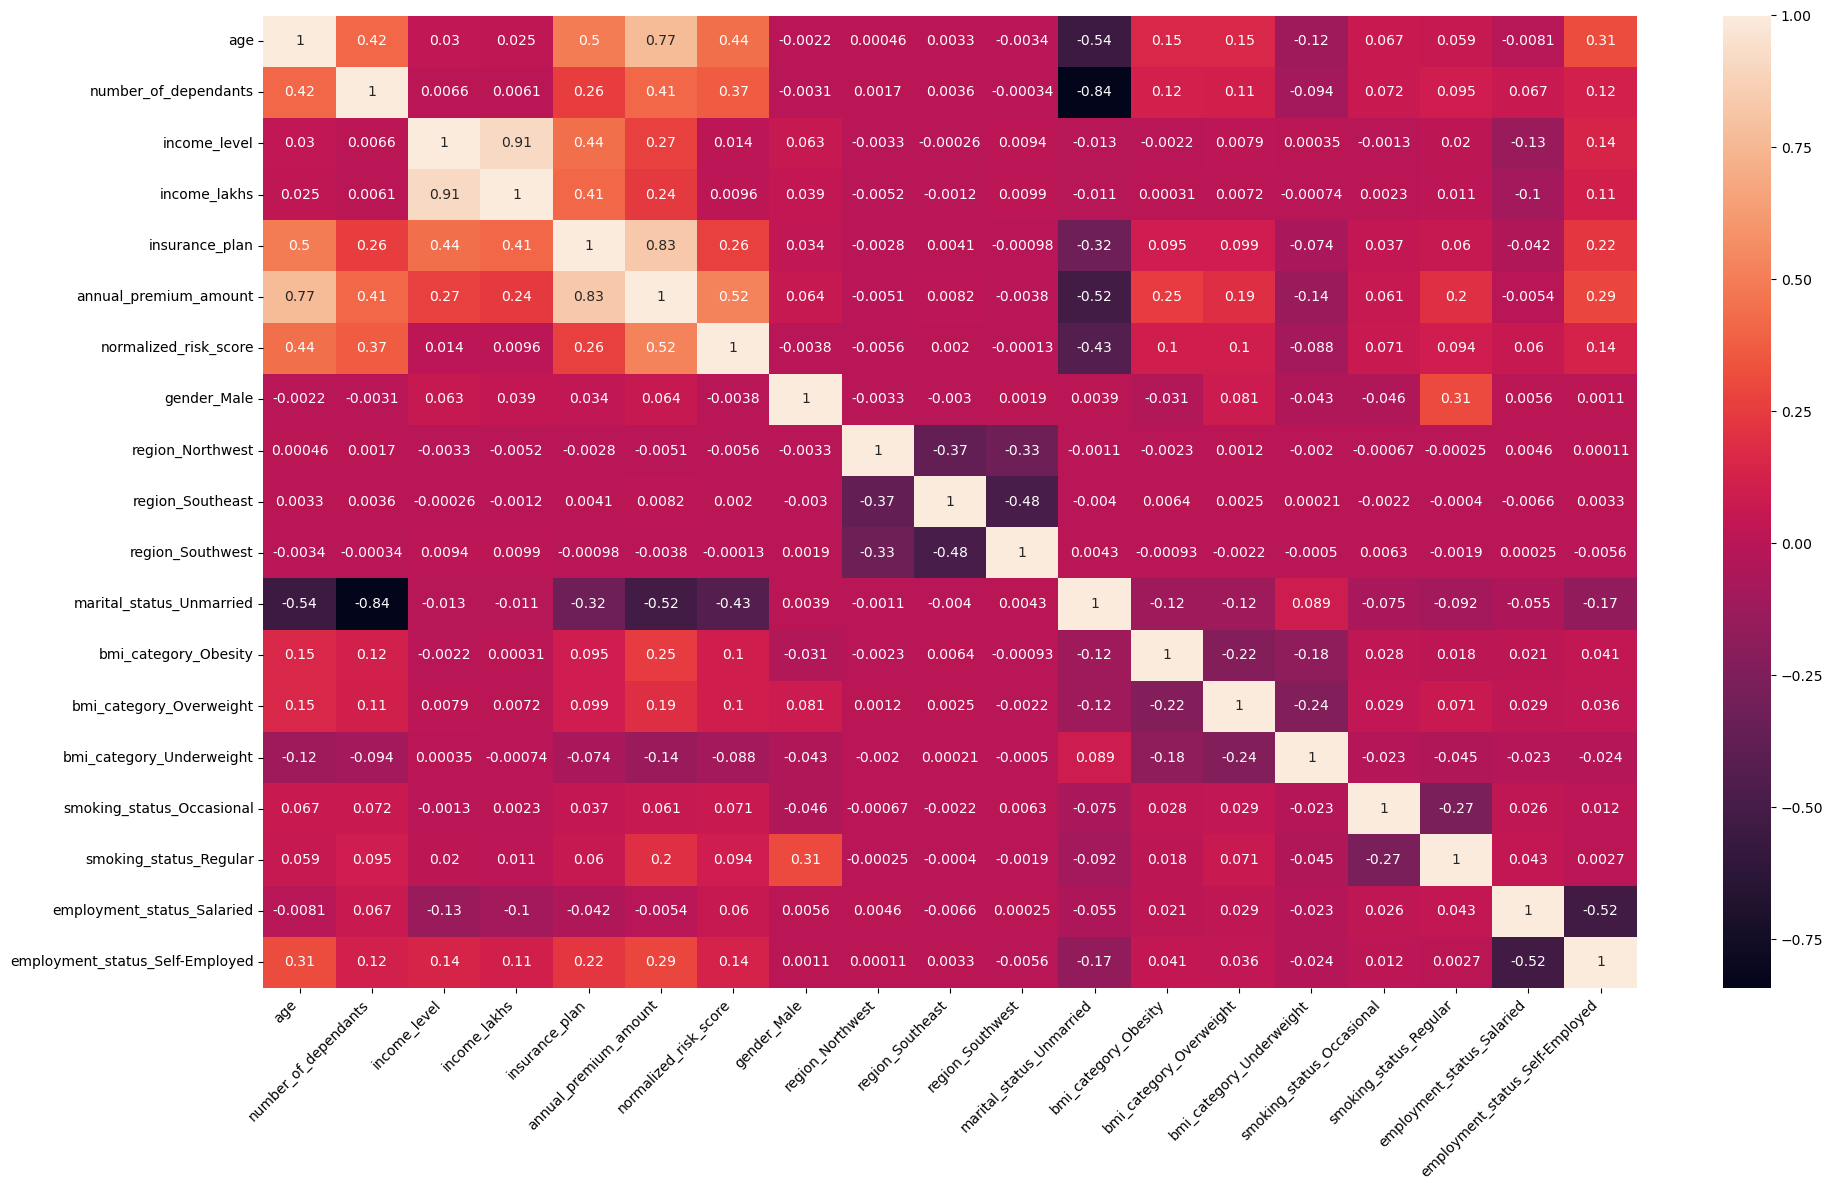

In [49]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [51]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [53]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [54]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

<h2 align="center" >Model Training</h2>

## **Train - Test Split**

The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

### **Underfitting and Overfitting**
 
* **Underfitting**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.
 
* **Overfitting**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset.
An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. An under-fitted model, on the other hand, will perform worse on both datasets because it is unable to capture the trends and patterns underlying the dataset when training.

<br>





In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42
)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34935, 17)
x test:  (14973, 17)
y train:  (34935,)
y test:  (14973,)


## **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively. 


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:
 
* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.
 

<br>

 
<br>


## **Mathematics behind Linear Regression**
 
Here's the formula for simple linear regression.
 
$$y=\beta_0+\beta_1x+\epsilon$$
 
 
Let's understand each of the terms involved:
* For any given value of the independent variable (x), y is the predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y when x is 0.
* $\beta_1$is the regression coefficient, which tells us how much y will change as x increases.
* x is the independent or predictor variable that helps us predict y
* $\epsilon$ is the error left due to not so accurate calculation of the regression coefficients.
 
 
Linear regression determines the best fit line across your data by looking for the regression coefficient (B1) that minimizes the model's total error (e).
 
<br>


<div align="center">
  <img src="LR.png" width="600">
</div>
Let's understand the regression line with the example graph above. 

* The $\beta_0$ parameter indicates the intercept or the constant value of y when x is 0.

* The $\beta_1$ parameter is the slope or steepness of the regression line.

* The distance between the predicted value of y on the regression line and the corresponding true value of y is basically the error.




## **Errors in Regression**
 
The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.
 
Let's understand the various errors in Regression:
 
 
* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$
 
* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.
 
$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$
 
 
* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.
 
$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$
 

## **Finding the Best Fit Line**


We can proceed with the Linear Regression model after determining the correlation between the variables, independent variable, and target variable, and if the variables are linearly correlated.
Finding coefficients of linear regression is the process of determining the values of the coefficients ($\beta_0$ and $\beta_1$) in the equation of a linear regression model. The objective of finding the coefficients is to minimize the difference between the actual values of the target variable and the predicted values. 
 
The Linear Regression model will determine the best fit line for the scatter of data points.
 
The best fit line should have the minimum errors.
 
 
### **Cost Function**
 
The cost function assesses how well a machine learning model performs.
The cost function calculates the difference between predicted and actual values as a single real number.
 
The following is the distinction between the cost function and the loss function:
 
The loss function is the error for individual data points, while the cost function is the average error of n-samples in the data.
 
### **Residual Sum of Squares (RSS) or Sum of Squared Errors(SSE)**
 
Ordinary least square or Residual Sum of squares (RSS) or Sum of Squared Errors (SSE) is minimized to find the value of β0 and β1, to find the best fit of the predicted line.
 
$$ MSE = \frac{1}{N} RSS = \frac{1}{N}\sum_{i=1}^{n}(y-\hat y)^2 $$
 
Hence,
 
$$SSE = \sum_{i=1}^{n}(y-\hat y)^2 $$
 
There are two main methods to find the coefficients of linear regression: least squares and gradient descent.
 
### **Least Squares Estimators**
 
One of the methods to optimize the Linear Regression equation for the minimum SSE is using Least Squares Estimators. These are the following steps involved in finding out the best fit line parameters:
 
1. Differentiate the SSE with respect to $\beta_0$ and $\beta_1$
 
2. Setting the partial derivatives equal to zero yields **normal equations** which can then be manipulated to find $\beta_0$ and $\beta_1$ for the minimum SSE.
 
 
 
Find the whole derivation for Least Squares Estimators [here](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/notes_SLR.pdf).

### **Gradient Descent**

Gradient descent is an optimization algorithm that iteratively adjusts the coefficients to minimize the cost function. The cost function measures the difference between the actual and predicted values. The gradient descent algorithm updates the coefficients using the gradient of the cost function. The gradient of the cost function gives us the direction of the steepest descent, which we use to adjust the coefficients. The process is repeated until the cost function reaches a minimum.


#### Linear Regression Model

In [63]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9280957176093705, 0.9283765993531428)

In [64]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([11236.408263,  -536.61173 ,  -353.970671, 12515.43783 ,
        4846.886263,   121.53023 ,   -34.502191,    27.975046,
         -23.473726,  -821.780886,  3356.077504,  1613.142169,
         364.313509,   722.410515,  2261.978165,   149.571795,
         378.251303])

In [65]:
coff =  model_lr.coef_
coff

array([11236.408263,  -536.61173 ,  -353.970671, 12515.43783 ,
        4846.886263,   121.53023 ,   -34.502191,    27.975046,
         -23.473726,  -821.780886,  3356.077504,  1613.142169,
         364.313509,   722.410515,  2261.978165,   149.571795,
         378.251303])

                                 Coefficients
age                              11215.360582
number_of_dependants              -651.305134
income_lakhs                      -517.818014
insurance_plan                   12523.263434
normalized_risk_score             4787.372108
gender_Male                        157.088857
region_Northwest                   -15.958554
region_Southeast                    38.646598
region_Southwest                   -30.737681
marital_status_Unmarried          -922.276126
bmi_category_Obesity              3390.322018
bmi_category_Overweight           1598.429125
bmi_category_Underweight           397.223752
smoking_status_Occasional          727.809730
smoking_status_Regular            2238.314133
employment_status_Salaried         160.429837
employment_status_Self-Employed    434.159644


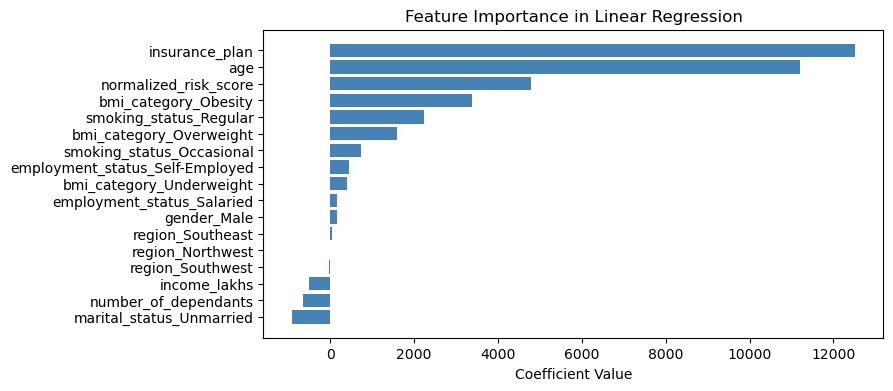

In [59]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])
print(coef_df)
# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression 

In [60]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9277073460089411, 0.9289900909397992)

### XGBoost

In [98]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
test = model_xgb.score(X_test, y_test)
train = model_xgb.score(X_train, y_train)
train,test

(0.9783400982554374, 0.9781450244378995)

In [99]:
# model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9810737806531126

In [100]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [102]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [103]:
best_model.feature_importances_

array([0.412953, 0.000182, 0.000194, 0.513155, 0.018843, 0.000303,
       0.000198, 0.000257, 0.000175, 0.000174, 0.017287, 0.011938,
       0.001185, 0.004143, 0.018554, 0.000175, 0.000286], dtype=float32)

In [104]:
best_model.feature_names_in_

array(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'], dtype='<U31')

## Error Analysis

In [106]:
## finding the residuals difference between predicted and actual values
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
24098,9246,9547.453125,301.453125,3.260363
201,11664,13488.259766,1824.259766,15.640087
25471,10472,7417.219727,-3054.780273,-29.170935
32500,26267,25508.873047,-758.126953,-2.886233
30832,9106,9547.453125,441.453125,4.847937


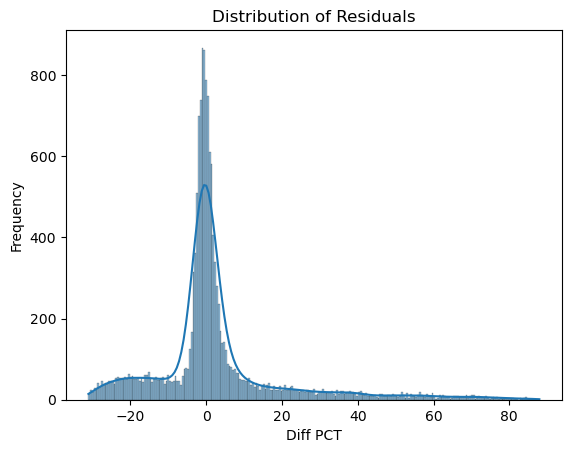

In [107]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

### Residual Analysis  

The distribution of residuals (percentage difference between predicted and actual premiums) highlights the performance of the model:  

- Most residuals are concentrated around **0%**, indicating that the model generally provides accurate predictions.  
- The distribution is **narrow and peaked**, suggesting that the majority of predictions are close to the actual values.  
- However, there are some extreme cases:  
Overestimation
  - **Overestimation**: Residuals as high as **+80%**, where the model predicted much higher than the actual premium.  
  - **Underestimation**: Residuals around **–20%**, where the model predicted lower than the actual premium.  
- These extreme errors likely occur due to **outliers** or unusual customer profiles that the model could not learn well.  
- Despite these outliers, the **majority of predictions fall within an acceptable error range**, confirming that the model is reliable for most cases.  

**Key Insight:**  
While the model performs well overall, insurers should be cautious with predictions for rare or extreme customer profiles, where residuals can be unusually high. 


In [ ]:
X_test.shape

(8947, 17)

In [108]:
#checking for extreme causes greater than 10%
extreme_error_threshold = 10  
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
201,11664,13488.259766,1824.259766,15.640087
25471,10472,7417.219727,-3054.780273,-29.170935
47939,11996,13450.725586,1454.725586,12.126755
26239,4436,6649.229492,2213.229492,49.892459
16907,8952,10888.099609,1936.099609,21.627565


In [109]:
extreme_results_df.shape

(4466, 4)

In [110]:
extreme_results_df.shape[0]*100/X_test.shape[0]

29.827021972884527

We have over 30% of records which are above +-10% 

In [111]:
extreme_results_df.index

Index([  201, 25471, 47939, 26239, 16907, 16861,  5849, 25369,  8403, 38677,
       ...
       39176, 23789, 24121,  4068, 41535, 21893, 37321, 43822, 24771,  7746],
      dtype='int64', length=4466)

In [112]:
X_test

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
24098,0.351852,0.6,0.010101,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0
201,0.129630,0.2,0.636364,1.0,0.000000,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.000000,1,1,0,0,1,0,1,0,0,1,1,0
32500,0.148148,0.4,0.202020,1.0,0.571429,1,0,0,1,0,0,0,0,0,0,1,0
30832,0.222222,0.2,0.080808,0.0,0.357143,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12123,0.259259,0.6,0.020202,0.0,0.357143,0,0,0,1,0,0,0,1,0,0,1,0
31891,0.185185,0.6,0.383838,0.5,0.000000,0,0,1,0,0,0,0,0,1,0,0,1
6713,0.481481,0.6,0.232323,0.5,0.428571,0,0,1,0,0,0,0,1,1,0,1,0
16957,0.685185,0.2,0.020202,0.5,0.857143,1,0,0,1,1,0,1,0,0,1,1,0


In [114]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,0.129630,0.4,0.242424,0.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0
37321,0.018519,0.4,0.171717,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
43822,0.111111,0.2,0.020202,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0
24771,0.425926,0.6,0.313131,0.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0


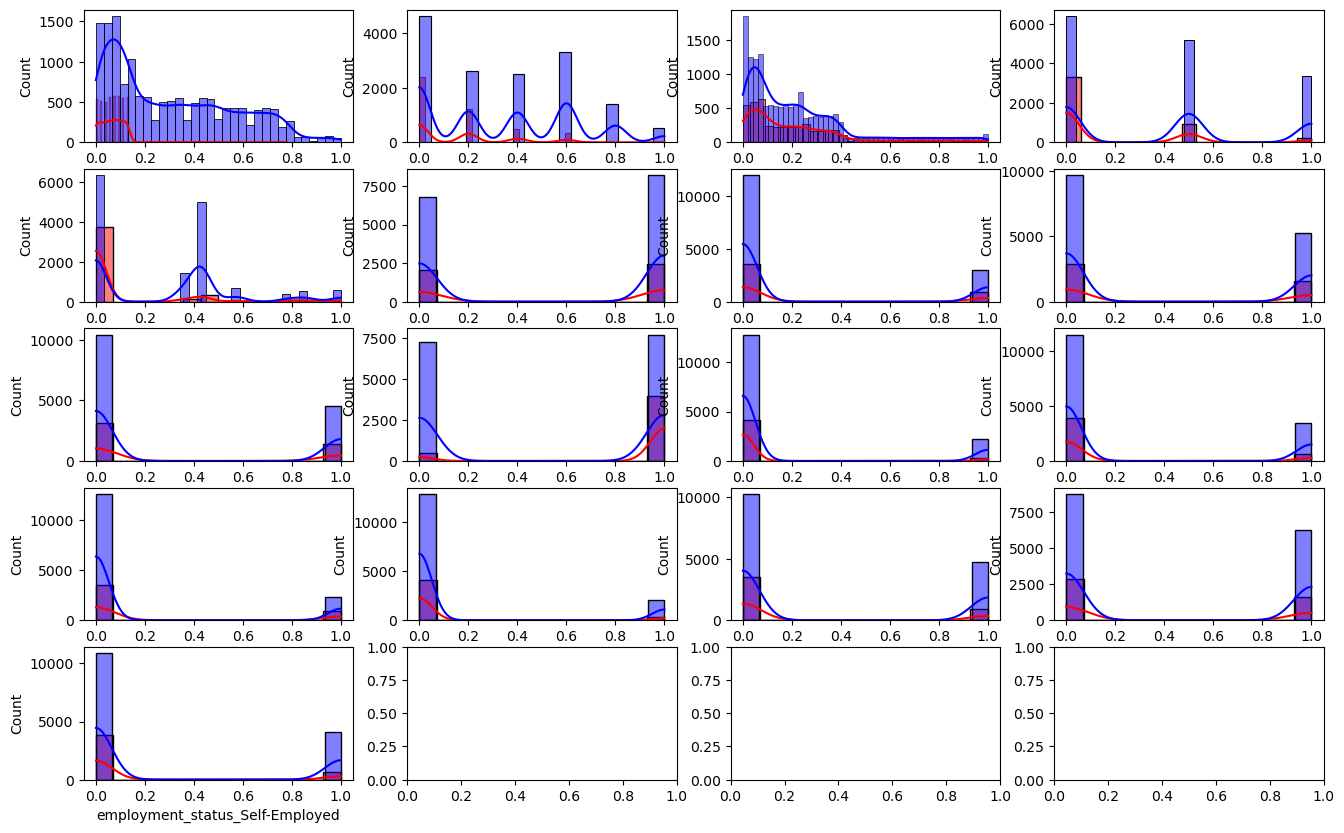

In [166]:
fig, axs =  plt.subplots(nrows=5, ncols=4, figsize=(16,10))
axs = axs.flatten()
for i, feature in enumerate(X_test.columns):
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True, ax=axs[i])
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True, ax=axs[i])
plt.show()

In [129]:
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,0.129630,0.4,0.242424,0.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0
37321,0.018519,0.4,0.171717,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
43822,0.111111,0.2,0.020202,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0
24771,0.425926,0.6,0.313131,0.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0


In [137]:
extreme_errors_df['income_level'] = -1

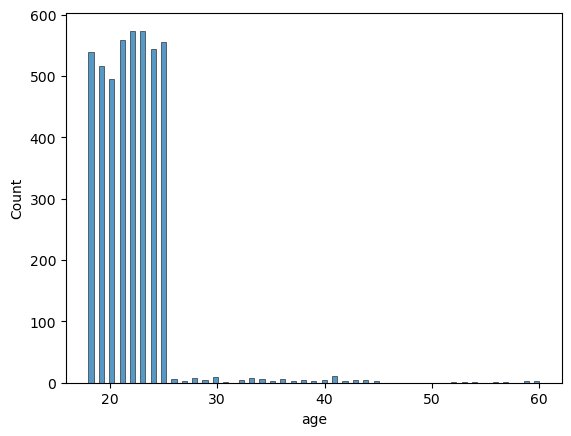

In [142]:
df_reversed =  pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed
sns.histplot(df_reversed.age)
plt.show()

From the above, we can see that majority of the errors are in ages less than 25

In [172]:
#checking the quantile of age
df_reversed.age.quantile(0.97)

25.0

97% of the age in the errors are 25 years and below